<p style="color:#FFF; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:48px; font-style:normal"><b>MATPLOTLIB</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2022-06</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

Le package [**matplotlib**](https://matplotlib.org) fournit à Python un ensemble d'outils très complets pour créer des visualisations scientifiques, qu'elles soient statiques, interactives ou animées. La documentation complète du package se trouve sur le site officiel [**matplotlib.org**](https://matplotlib.org/stable/users), mais une copie locale est directement disponible dans le menu **`Help`** de JupyterLab, sous le titre ***Matplotlib Reference***.

Le package **matplotlib** est extrêmement riche en termes de fonctionnalités, et cette richesse implique une certaine complexité de mise en oeuvre. Mais en fait, la difficulté principale rencontrée durant la phase d'apprentissage des outils de visualisation disponibles, réside dans le fait que la bibliothèque peut s'utiliser selon ***deux modes totalement incompatibles*** : un mode de base (appelé ***state-mode***) qui reprend globalement le processus mis en oeuvre dans Matlab (également repris dans R-Studio), et un mode plus avancé (appelé ***object-mode***) qui utilise le paradigme objet disponible en Python pour manipuler les figures comme des objets graphiques dont on peut contrôler l'ensemble des paramètres. Malheureusement, les tutos disponibles sur le web, utilisent l'un ou l'autre de ces modes sans forcément le préciser, et tenter de combiner des bouts de code utilisant deux modes différents est non seulement voué à l'échec, mais va produire des erreurs très difficilement compréhensibles.

Ce chapitre a pour objet de faire un tour d'horizon rapide et de montrer les fonctionnalités les plus utiles de **matplotlib** dans le cadre d'une utilisation au sein de l'environnement Jupyter. On va ainsi **se limiter au** ***state-mode*** qui est suffisamment flexible pour le type de visualisations abordées. Une fois que l'on a maîtrisé les concepts de base du package, le plus efficace est de se reporter à la [**galerie des exemples**](https://matplotlib.org/stable/gallery) sur le site de Matplotlib, pour piocher le code associé au type de visualisation qu'on souhaite mettre en oeuvre. Il faut noter que le point fort de **matplotlib** réside dans sa collaboration étroite avec le package **numpy** qui va permettre une visualisation performante pour les données 1D ou 2D. Par contre, il est nettement moins performant pour la visualisation de données 3D, car **matplotlib** n'utilise pas les fonctionnalités des cartes graphiques modernes qui permettent d'accélérer énormément l'affichage en mode 3D. Il est donc préférable d'utiliser d'autres packages (par exemple, **vispy**, **pyvista**, **ipygany**, etc) lorsqu'on souhaite afficher et interagir avec des données 3D.
    
---
On importe habituellement le package **matplotlib** par le biais d'un alias court, avec l'une des deux commandes suivantes :
> **`import matplotlib.pyplot as mp`** &emsp;ou&emsp; **`import matplotlib.pyplot as plt`**

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
import matplotlib.pyplot as mp # import du package 'matplotlib' avec alias 'mp'
from SRC.tools import show # import de la fonction 'show' permettant de simplifier certaines explications

Le package propose de choisir parmi une liste de **styles prédéfinis** pour contrôler l'aspect esthétique des visualisations

In [2]:
mp.style.use('default') # styles usuels : default / classic / grayscale / bmh / ggplot / seaborn

Avec l'environnement Jupyter, les figures générées par **matplotlib** sont automatiquement converties en images au format PNG, puis insérées dans le notebook après la cellule ayant créé la figure. Ce comportement par défaut peut être modifié avec la commande magique **`%matplotlib <mode>`** qui propose plusieurs modes d'affichage :

- **`%matplotlib inline`** : inclusion des figures dans le notebook (mode par défaut)
- **`%matplotlib tk`** : affichage des figures dans un popup interactif, via la biliothèque **tk**
- **`%matplotlib qt`** : affichage des figures dans un popup interactif, via la bibliothèque **qt** (à installer spécifiquement)

Pour maîtriser les outils fournis par **matplotlib**, il est important de bien identifier les différentes composantes mises en oeuvre dans la création des figures. L'image ci-dessous, extraite de la documentation officielle du package, permet de lister le vocabulaire utilisé et les noms des fonctions associées :

<center><img src='IMG/anatomy.png' width=512></center>

<h2 style="padding:16px; color:#FFF; background:#07D">A - Visualisation de données 1D</h2>

La visualisation de données à une dimension s'effectue à l'aide de la fonction **`plot`**

### 1 - Visualisation de données discrètes : $\small \{z_k \;\textrm{pour}\; k \in 0\!:\!n\}$

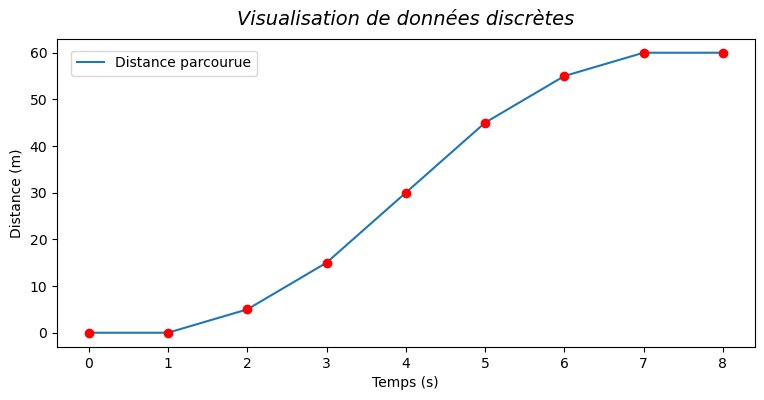

In [3]:
time = [0, 1, 2, 3, 4, 5, 6, 7, 8]
dist = [0, 0, 5, 15, 30, 45, 55, 60, 60]

mp.figure(figsize=(9,4), dpi=100) # choix de la taille (en pouces) et de la précision (en points par pouce)
mp.plot(time, dist) # affichage sous forme de segments bleus (par défaut)
mp.plot(time, dist, 'or') # affichage sous forme de disques (= 'o') rouges (= 'r')
mp.xlabel('Temps (s)') # ajout d'un label pour l'axe des 'x'
mp.ylabel('Distance (m)') # ajout d'un label pour l'axe des 'y'
mp.legend(['Distance parcourue'], loc=(0.02, 0.88)) # ajout et positionnement d'une légende
mp.title('Visualisation de données discrètes', pad=10, fontsize=14, style='italic'); # ajout d'un titre
mp.savefig('IMG/plot.png') # conversion en image matricielle au format PNG (résolution = figsize * dpi)
mp.savefig('IMG/plot.svg') # conversion en image vectorielle au formmt SVG (toute résolution)

---
### 2 - Visualisation de fonctions cartésiennes : $y = f(x)$

In [4]:
def f(x):
  """Hermite step function"""
  return x*x*(3-2*x)

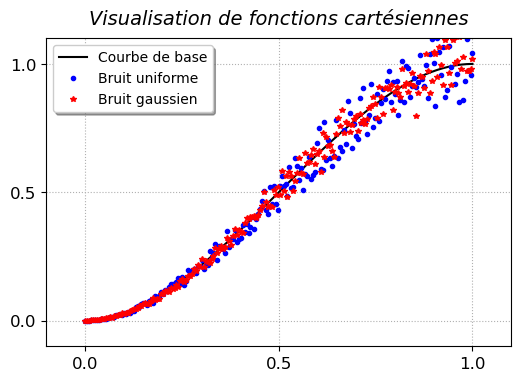

In [5]:
n = 200 # nombre d'échantillons
x = np.linspace(0, 1, n) # échantillonnage de l'intervalle [0,1] en 'n' valeurs uniformes
y1 = f(x) # fonction sans bruit
y2 = f(x) * (1.0 + 0.05*np.random.uniform(-3, 3, n)) # ajout d'un bruit multiplicatif uniforme
y3 = f(x) * (1.0 + 0.05*np.random.normal(0, 1, n)) # ajout d'un bruit multiplicatif gaussien

mp.figure(figsize=(6,4), dpi=100) # choix de la taille et de la précision
mp.plot(x, y1, 'k-', label='Courbe de base') # tracé sous forme de segments ('-') noirs ('k')
mp.plot(x, y2, 'bo', label='Bruit uniforme', ms=3) # tracé sous forme de disques ('o') bleus ('b')
mp.plot(x, y3, 'r*', label='Bruit gaussien', ms=4) # tracé sous forme d'étoiles ('*') rouges ('r')
mp.legend(loc='upper left', shadow=True) # ajout de la légende avec les labels des courbes
mp.axis([-0.1, 1.1, -0.1, 1.1]) # amplitude des axes [xmin, xmax, ymin, ymax]
mp.xticks([0,0.5,1], size='large'); mp.yticks([0,0.5,1], size='large') # graduation des axes
mp.grid(linestyle=':') # style de grille ('-' = trait continu, ':' = trait pointillé)
mp.title('Visualisation de fonctions cartésiennes', pad=10, fontsize=14, style='italic');

---
### 3 - Visualisation de fonctions paramétriques : $x=f(t) \;,\; y=g(t)$

In [6]:
def fxy(t):
  """lissajous curve (parametric definition)"""
  return np.sin(5*t), np.sin(6*t)

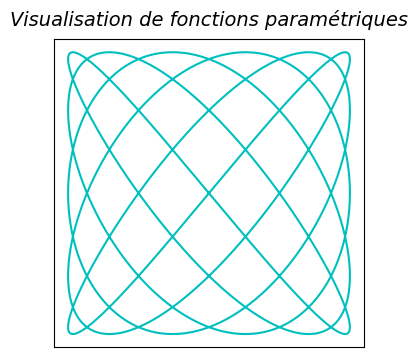

In [7]:
n = 2000 # nombre d'échantillons
t = np.linspace(0, 2*np.pi, n) # échantillonnage de l'intervalle [0,2*pi] en 'n' valeurs
x, y = fxy(t) # échantillonnage des coordonnées 'x' et 'y' de la fonction

mp.figure(figsize=(4,4), dpi=100) # choix de la taille et de la précision
mp.plot(x, y, 'c-') # tracé sous forme de segments ('-') cyan ('c')
mp.axis('equal') # on force la même échelle sur les deux axes
mp.xticks([]); mp.yticks([]) # suppression des graduations sur les axes
mp.title('Visualisation de fonctions paramétriques', pad=10, fontsize=14, style='italic');

<h2 style="padding:16px; color:#FFF; background:#07D">B - Visualisation de données 2D</h2>

La visualisation de données à deux dimensions s'effectue à l'aide des fonctions **`scatter`** et **`plot_surface`**

### 1 - Visualisation de données éparses : $\small \{(x_k,y_k) \;\textrm{pour}\; k \in 0\!:\!n\}$

samples.shape ━► (500, 2)
choices.shape ━► (100, 2)

samples[:3] ━►
[[-0.7531111  -0.53725285]
 [ 2.81124229  0.40504703]
 [-0.98271921 -1.04197716]]

*samples.T[:,:3] ━►
[-0.7531111   2.81124229 -0.98271921] [-0.53725285  0.40504703 -1.04197716]


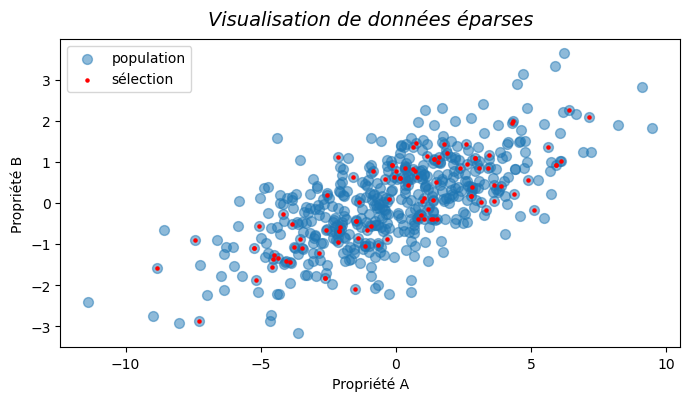

In [8]:
n, mean, covar = 500, [0,0], [[9,2], [2,1]] # nombre d'échantillons, moyenne et matrive de covariance
samples = np.random.multivariate_normal(mean, covar, n) # échantillonnage multivarié selon loi normale
choices = samples[np.random.choice(range(n), n//5)] # sélection aléatoire d'un échantillon sur 5
show("samples.shape; choices.shape;; samples[:3]#;; *samples.T[:,:3]#")

mp.figure(figsize=(8,4), dpi=100) # choix de la taille et de la précision
mp.scatter(*samples.T, s=50, alpha=0.5); mp.scatter(*choices.T, s=5, c='r') # affichage des données éparses
mp.xlabel('Propriété A'); mp.ylabel('Propriété B'); mp.legend(['population','sélection'], loc='upper left')
mp.title('Visualisation de données éparses', pad=10, fontsize=14, style='italic');

---
### 3 - Visualisation de surfaces d'élévation : $z = f(x,y)$

In [9]:
def fz(x, y, args):
  """sum of two-dimensional Gaussian lobes"""
  return sum([c*np.exp(-(a*x-a*u)**2-(b*y-b*v)**2) for u,v,a,b,c in args])

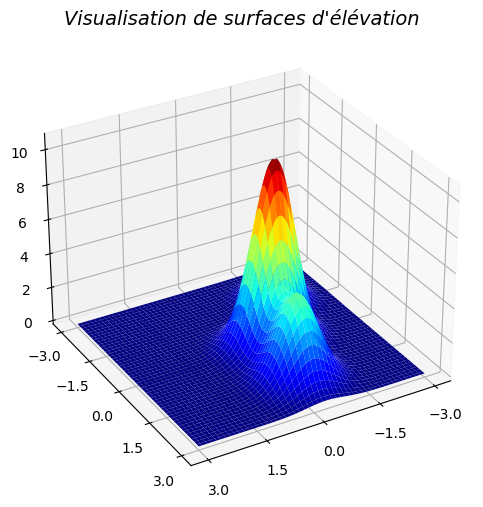

In [10]:
from mpl_toolkits.mplot3d import axes3d # par défaut, les axes 3D ne sont pas importés
m, n = 5, 200 # nombre de lobes, nombre d'échantillons en x et y
x, y = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-3, 3, n)) # échantillonnage de la grille (x,y)
ranges = [(-2,2), (-2,2), (1,2), (1,2), (3,7)] # amplitudes de variation des paramètres des lobes
args = np.array([np.random.uniform(a,b,m) for (a,b) in ranges]).T # choix aléatoire des paramètres
z = fz(x, y, args) # calcul de l'altitude pour chaque couple (x,y) de la grille

# enlever le commentaire de la ligne suivante pour créer une visualisation interactive
# %matplotlib tk
# enlever le commentaire de la ligne suivante pour réinsérer la figure dans le notebook
# %matplotlib inline

mp.figure(figsize=(6,6), dpi=100) # choix de la taille et de la précision
axes = mp.subplot(projection='3d') # création d'un tracé avec projection 3D
#axes.plot_wireframe(x, y, z, linewidth=0.5) # affichage du maillage de la surface d'élévation
axes.plot_surface(x, y, z, cmap='jet') # affichage de la surface d'élévation (résolution automatique)
#axes.plot_surface(x, y, z, rstride=1, cstride=1, cmap='jet') # affichage haute résolution
axes.set_xticks([-3, -1.5, 0, 1.5, 3]); axes.set_yticks([-3, -1.5, 0, 01.5, 3]) # graduation des axes
axes.view_init(elev=30, azim=60) # angles de vue (élévation et azimuth)
mp.title("Visualisation de surfaces d'élévation", fontsize=14, style='italic');

<h2 style="padding:16px; color:#FFF; background:#07D">C - Visualisation de matrices de données</h2>

La visualisation de matrices de données s'effectue à l'aide de la fonction **`imshow`**

### 1 - Visualisation de matrices scalaires : $\small\{z_{ij} \;\textrm{pour}\; i \in [0\!:\!n]\; j \in [0\!:\!m]\}$

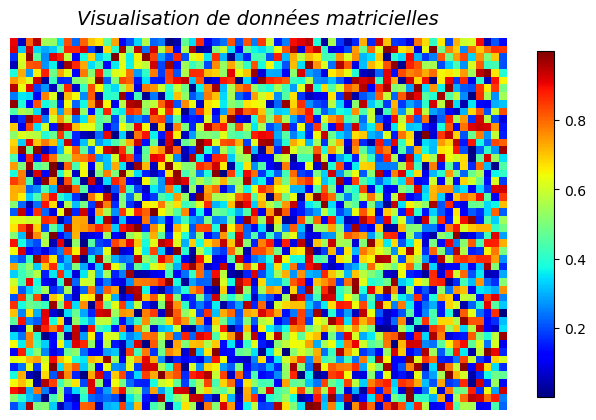

In [11]:
m, n = 48, 64 # taille de la matrice !! ordre matriciel et non cartésien pour les indices !!
data = np.random.rand(m, n) # distribution uniforme sur [0,1]
#data = np.random.normal(0, 1, (m, n)) # distribution normal (moyenne = 0, écart-type = 1)
#data = np.add.outer(range(m),range(n)) # table d'addition [0,m[ x [0,n]
#data = np.multiply.outer(range(m),range(n)) # table de multiplication [0,m[ x [0,n]

mp.figure(figsize=(8,5), dpi=100) # choix de la taille et de la précision
#mp.imshow(data) # affichage sans interpolation et avec échelle de couleurs par défaut ('viridis')
mp.imshow(data, cmap='jet') # idem avec échelle de couleurs spécifique ('jet' = couleurs froides --> chaudes)
#mp.imshow(data, cmap='jet', interpolation='bicubic') # idem avec interpolation spécifique (sinus cardinal)
mp.colorbar(shrink=0.9) # affichage de la gradation colorimétrique
mp.axis(False) # suppression des axes de coordonées
mp.title('Visualisation de données matricielles', pad=10, fontsize=14, style='italic');

# ----------------------------------------------------------------------------------------------------------
# Liste des échelles de couleurs possibles : (le suffixe '_r' permet d'obtenir l'échelle inverse)
# [viridis] / jet / gray / hsv / prism / spring / summer / autumn / winter / Reds / Greens / Blues
# ----------------------------------------------------------------------------------------------------------
# Liste des modes d'interpolation possibles :
# [nearest] / bilinear / bicubic / spline16 / spline36 / hanning / hamming / hermite
# kaiser / quadric / catrom / gaussian / bessel / mitchell / sinc / lanczos

---
### 2 - Visualisation d'images RGB

RGB.shape ━► (480, 640, 3)
RGB.dtype ━► uint8


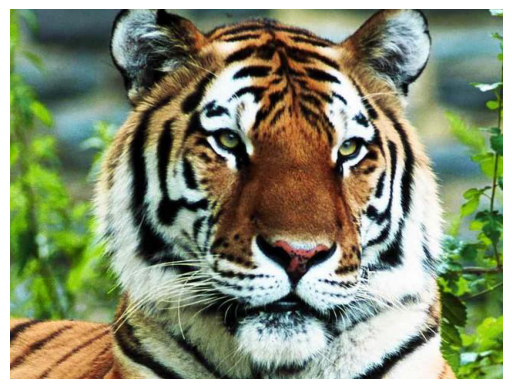

In [12]:
RGB = mp.imread('IMG/tiger.jpg') # lecture de l'image sur disque
show("RGB.shape; RGB.dtype")
mp.imshow(RGB); mp.axis(False); # affichage de l'image avec les paramètres par défaut

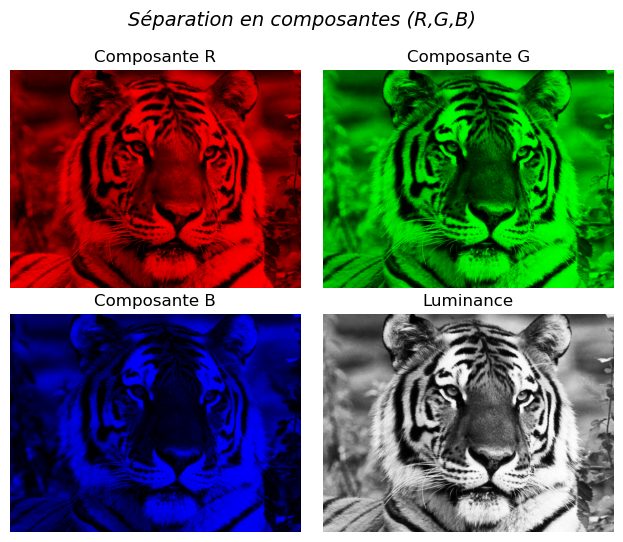

In [13]:
R, G, B = np.split(RGB, 3, axis=2) # séparation de l'image en 3 canaux R, G, B
# version alternative : R, G, B = [RGB[:, :, c] for c in (0,1,2)]
L = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8) # conversion de l'image en luminance
Z = np.zeros_like(L) # création d'une image à valeurs nulles (taille et type identiques à 'L')

mp.figure(figsize=(8,6)) # choix de la taille de la figure
# chaque appel à 'subplot' crée une nouvelle zone dans la figure principale
mp.subplot(221) # 221 = image 1 [NW] d'une grille 2x2 # mp.subplot(2,2,1) donne la même chose
mp.imshow(np.dstack([R, Z, Z])); mp.axis(False); mp.title('Composante R')
mp.subplot(222) # 222 = image 2 [NE] d'une grille 2x2
mp.imshow(np.dstack([Z, G, Z])); mp.axis(False); mp.title('Composante G')
mp.subplot(223) # 223 = image 3 [SW] d'une grille 2x2
mp.imshow(np.dstack([Z, Z, B])); mp.axis(False); mp.title('Composante B')
mp.subplot(224) # 224 = image 4 [SE] d'une grille 2x2
mp.imshow(np.dstack([L, L, L]));mp.axis(False); mp.title('Luminance')
mp.subplots_adjust(wspace=0.02, hspace=0.12) # choix de l'espace entre les cases de la grille
mp.suptitle("Séparation en composantes (R,G,B)", fontsize=14, style='italic'); # titre global

<h2 style="padding:16px; color:#FFF; background:#07D">D - Interaction et Animation</h2>

---
### 1 - Interaction

Comme on l'a vu dans le chapitre 3, le package [**ipywidgets**](https://github.com/jupyter-widgets/ipywidgets) permet d'ajouter un ensemble de widgets d'interaction pour modifier les paramètres des fonctions contenues dans un notebook, sans être obligé de modifier les cellules de code correspondantes. Ce package fonctionne bien évidemment avec les fonctions graphiques de **matplotlib**, l'idée étant de réaliser la même séparation que pour les fonctions non-graphiques : d'une côté, une fonction de calcul, de l'autre, une fonction d'affichage utilisant le décorateur **`interact`** ou **`interact_manual`** pour définir les intervalles de variation des différents paramètres interactifs :

In [14]:
from ipywidgets import interact, interact_manual # import des fonctions d'interaction

In [15]:
def lissajous(a, b, n=2000): # fonction de calcul (fonctions paramétriques de Lissajous)
  t = np.linspace(0, 2*np.pi, n) # échantillonnage de l'intervalle [0,2*pi] en 'n' valeurs uniformes
  return np.sin(a*t), np.sin(b*t) # calcul des vecteurs pour les coordonnées x et y

@interact(a=(1,15), b=(1,15)) # décorateur d'interaction (intervalle de variation des paramètres)
def show_lissajous(a=1, b=2): # fonction d'affichage (valeurs par défaut des paramètres)
  x, y = lissajous(a, b) # appel de la fonction de calcul (valeur par défaut pour le paramètre 'n')
  mp.figure(figsize=(4,4)) # choix de la taille de la figure
  mp.plot(x, y, 'c-'); mp.axis('equal'); mp.xticks([]); mp.yticks([])
  mp.title(f"Lissajous Curve (a={a},b={b})", pad=10, fontsize=14, style='italic')

interactive(children=(IntSlider(value=1, description='a', max=15, min=1), IntSlider(value=2, description='b', …

Comme on l'a également vu dans le chapitre 3, lorsqu'il faut modifier plusieurs paramètres à la fois avant de relancer le calcul, il est préférable d'utiliser le décorateur **`interact_manual`** au lieu de **`interact`**. Dans ce cas, la mise à jour de l'affichage est différé jusqu'au moment où l'utilisateur clique sur le bouton intitulé ***`Run Interact`*** :

In [16]:
def curly_lissajous(a, b, c, d, n=20000): # fonction de calcul (lissajous avec orbites)
  t = np.linspace(0, 2*np.pi, n)
  return np.sin(a*t) + d*np.cos(max(a,b)*c*t), np.sin(b*t) + d*np.sin(max(a,b)*c*t)

@interact_manual(a=(1,15), b=(1,15), c=(0,10), d=(0.0,1.0)) # décorateur d'interaction
def show_curly_lissajous(a=1, b=2, c=5, d=0.5): # fonction d'affichage
  x, y = curly_lissajous(a, b, 8*c, 0.25*d) # appel de la fonction de calcul
  mp.figure(figsize=(4,4)) # choix de la taille de la figure
  mp.plot(x, y, 'c-'); mp.axis('equal'); mp.xticks([]); mp.yticks([])
  mp.title(f"Curly Lissajous Curve ({a},{b})", pad=10, fontsize=14, style='italic')

interactive(children=(IntSlider(value=1, description='a', max=15, min=1), IntSlider(value=2, description='b', …

---
### 2 - Animation

Le package **matplotlib** contient un module `animation` qui permet de créer une visualisation graphique incluant une séquence d'animation. Le principe est de créer une séquence d'images à intervalle de temps fixe, et d'utiliser les outils JavaScript du navigateur pour animer ou explorer cette séquence d'images

In [17]:
from matplotlib.animation import FuncAnimation as animation # import de la fonction d'animation
from matplotlib import rc; rc('animation', html='jshtml') # on utilise 'jshtml' pour les animations
import warnings; warnings.filterwarnings('ignore') # on enlève les 'warning' pour 'animation deletion'

In [18]:
n = 250; x, y = lissajous(2, 9, n) # 'n' représente le nb de frames pour l'animation

def animate(n): data.set_data(x[n], y[n]) # modification de la position du disque rouge pour une frame 'n'

fig = mp.figure(figsize=(12,3)); mp.xticks([]); mp.yticks([])
mp.plot(x, y, 'k-') # tracé fixe sous forme de segments noirs
data, = mp.plot(x[0], y[0], 'ro', ms=15) # tracé animé sous forme de disque rouge de diamètre 15 pixels
mp.close() # fermeture de l'image statique, après le tracé des différentes composantes
anim = animation(fig, animate, frames=n, interval=25) # création de l'animation (calcul des 'n' frames)
#anim # enlever le '#' en préfixe de ligne, pour inclure l'animation directement dans le notebook

Il faut savoir que l'inclusion d'une animation matplotlib dans un notebook va **très fortement augmenter la taille sur disque** de ce notebook, car l'intégralité de la séquence d'images nécessaire à l'animation va être stockée au format JSON (c'est-à-dire réencodée sous forme de chaîne de caractères) dans le fichier **`ipynb`** du notebook. Il est donc beaucoup plus efficace de stocker le résultat de l'animation dans un fichier externe (en choisissant un format standard, soit GIF animé, soit MP4), puis de visualiser ultérieurement ce fichier, en utilisant soit une balise HTML **`<video>`** , soit la fonction **`Video`** fournie par le module **`display`** vu dans le chapitre 3 :

In [19]:
anim.save('IMG/anim.mp4') # conversion de l'animation en MP4 et sauvegarde dans un fichier vidéo

In [20]:
%%html
<video height=180 autoplay loop> <source src='IMG/anim.mp4'> </video>

In [21]:
import IPython.display as dp
dp.Video('IMG/anim.mp4', height=180, html_attributes='autoplay loop')

---